<a href="https://colab.research.google.com/github/LeratoMatlala1/Prediction-of-Product-Sales/blob/main/Prediction_of_Product_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Title: Prediction of Product Sales


Author: Lerato Matlala

## Project Overview

## Load and Inspect Data

***Import Libraries***

In [147]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


***Loading the data from path***

In [148]:
filepath = '/content/drive/MyDrive/Coding Dojo/Week 2/Assignments/sales_predictions_2023.csv'

Salesdf = pd.read_csv(filepath)

#Display top 5 rows of the dataframe
Salesdf.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [149]:
#Print summary information about the dataframe
Salesdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


## Clean Data

***1) How many rows and columns?***

In [150]:
Salesdf.shape

(8523, 12)

- There are 8523 rows and 12 colums in the dataframe

***2) What are the datatypes of each variable?***



In [151]:
Salesdf.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

***3) Are there duplicates? If so, drop any duplicates.***

In [152]:
Salesdf.duplicated().sum()

0

- There are no duplicates in the data



***4) Identify missing values.***

In [153]:
Salesdf.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

- There are missing values in the Item_Weight and Outlet_Size columns

***5) Address the missing values by using a placeholder value.***

In [154]:
#Salesdf['Outlet_Size']= Salesdf['Outlet_Size'].fillna('Missing')
#Salesdf['Item_Weight'] = Salesdf['Item_Weight'].fillna(0)

***6) Confirm that there are no missing values after addressing them.***

In [155]:
Salesdf.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

***7) Find and fix any inconsistent categories of data (for example: fix cat, Cat, and cats so that they are consistent).***

In [156]:
#First determine the categorical columns
CatColumns = Salesdf.select_dtypes(object).columns
CatColumns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [157]:
#determinine the unique values in the categorical columns
Salesdf[CatColumns].nunique()

Item_Identifier         1559
Item_Fat_Content           5
Item_Type                 16
Outlet_Identifier         10
Outlet_Size                3
Outlet_Location_Type       3
Outlet_Type                4
dtype: int64

In [158]:
#display the values for all categoriavl columns except for Item_Identifier as it has a lot of values
CatColumns = Salesdf.select_dtypes(object).columns.drop('Item_Identifier')

for i in CatColumns:
    print(f'Value counts for {i}')
    print(Salesdf[i].value_counts())
    print('\n')

Value counts for Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64


Value counts for Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64


Value counts for Outlet_Identifier
OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64


Value counts for Outlet_Size
Medium    2793
Small     2388
High       932
Name: Outlet_Size, 

- Item_Fat_Content has inconsitent values:'LF', 'reg', 'low fat'


In [159]:
#replacing the inconsistent values with the correct values
Salesdf['Item_Fat_Content'] = Salesdf['Item_Fat_Content'].replace(['LF','low fat'],'Low Fat')
Salesdf['Item_Fat_Content'] = Salesdf['Item_Fat_Content'].replace('reg','Regular')

In [160]:
#Checking if the values have been fixed
Salesdf['Item_Fat_Content'].value_counts()


Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

***8) For any numerical columns, obtain the summary statistics of each (min, max, mean).***

In [161]:
#Get all numeric columns
NumColumns = Salesdf.select_dtypes('number').columns
NumColumns

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')

In [162]:
#show summary statistics for the numeric columns
Salesdf[NumColumns].describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


## Exploratory Data Analysis

### Univariate Analysis

#### Histograms

Using Seaborn to plot the histograms for each numerical feature in the data

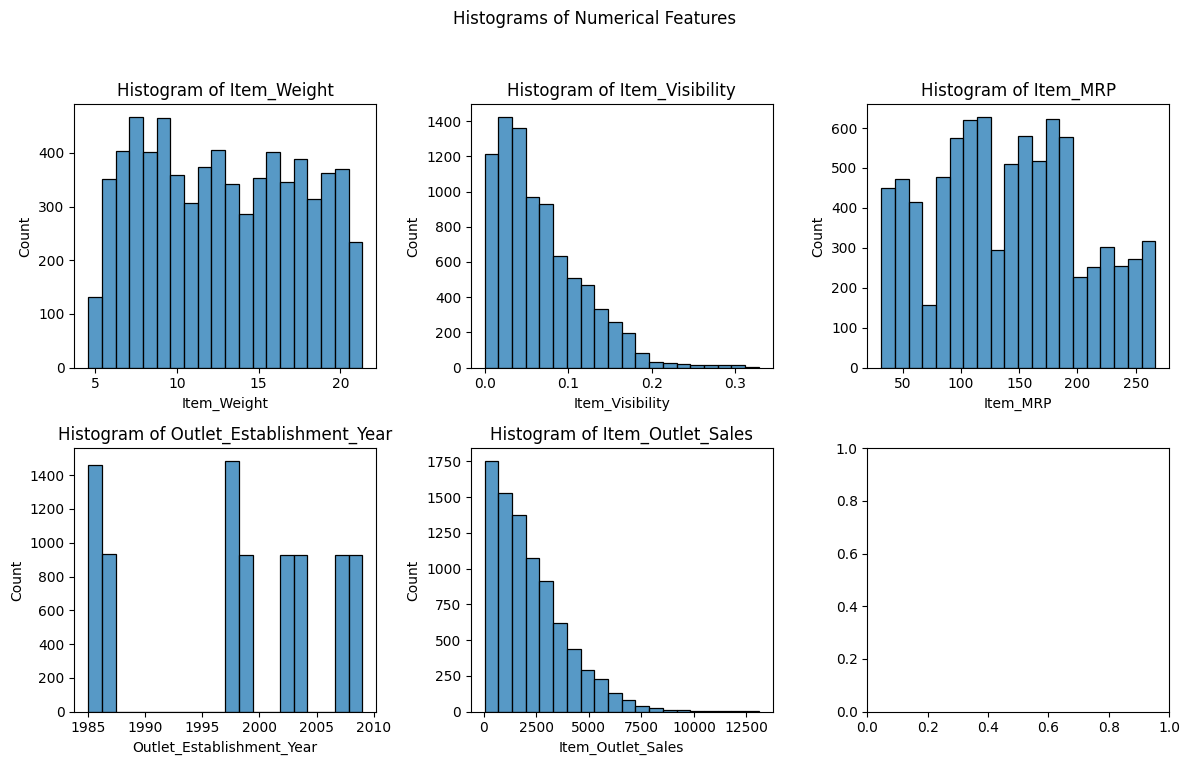

In [163]:
numerical_features = ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year', 'Item_Outlet_Sales']

fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(12, 8))

# Plotting histograms for each numerical feature on its own subplot using Seaborn
for i, feature in enumerate(numerical_features):
    row = i // 3
    col = i % 3
    sns.histplot(data=Salesdf, x=feature, bins=20,  ax=ax[row, col])
    ax[row, col].set_title(f"Histogram of {feature}")

plt.suptitle("Histograms of Numerical Features")

# Adjusting the layout to avoid overlap of titles
plt.tight_layout(rect=[0, 0.03, 1, 0.95]);

#### Boxplots

Creating boxplots to view statistical summaries of numerical features

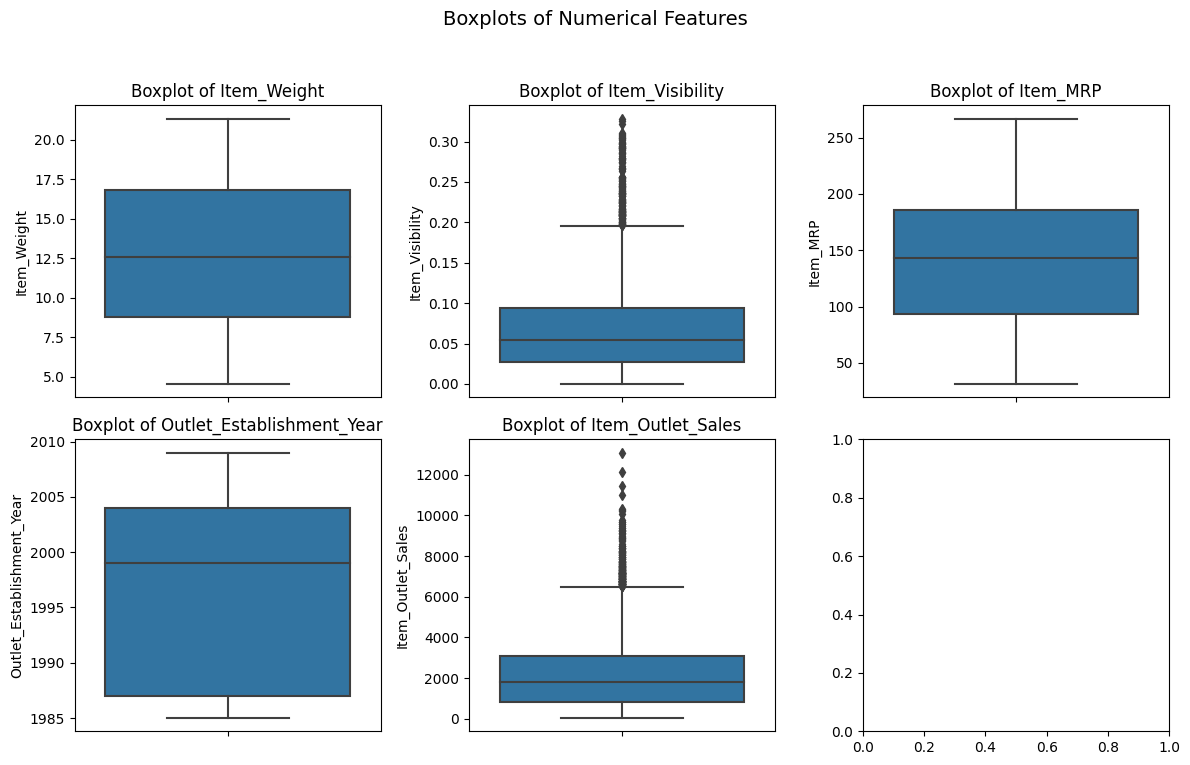

In [164]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 8))

# Plotting boxplots for each numerical feature on its own subplot using Seaborn
for i, feature in enumerate(numerical_features):
    row = i // 3
    col = i % 3
    sns.boxplot(data=Salesdf, y=feature, ax=axes[row, col])
    axes[row, col].set_title(f"Boxplot of {feature}")

plt.suptitle("Boxplots of Numerical Features", fontsize=14)
plt.tight_layout(rect=[0, 0.03, 1, 0.95]);


#### Countplots

Creating counplots to analyse the distribution of categorical features

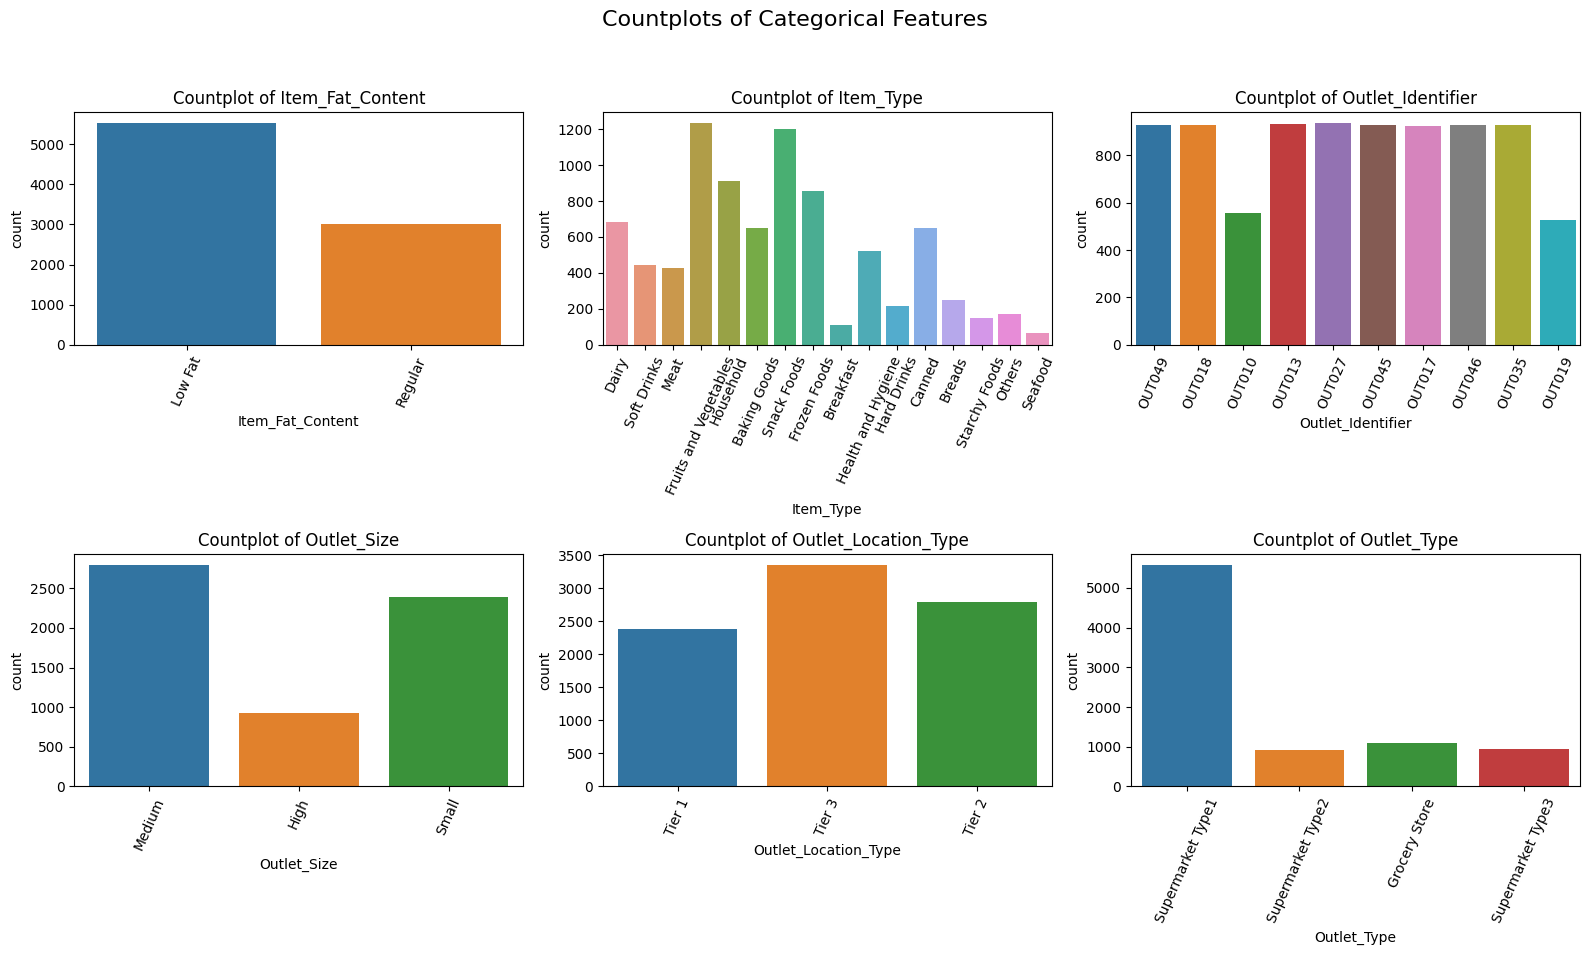

In [165]:
categorical_features = ['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(16, 10))

# Plotting countplots for each categorical feature on its own subplot using Seaborn
for i, feature in enumerate(categorical_features):
    row = i // 3
    col = i % 3
    sns.countplot(data=Salesdf, x=feature, ax=axes[row, col])
    axes[row, col].set_title(f"Countplot of {feature}")
    axes[row, col].tick_params(axis='x', rotation=66)

plt.suptitle("Countplots of Categorical Features", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95]);


### Multivariate Analysis

#### Correlation Heatmap

Creating a correlation heatmap to visualize the pairwise correlation between the numerical features

<ipython-input-166-38fb966f9e89>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = Salesdf.corr()


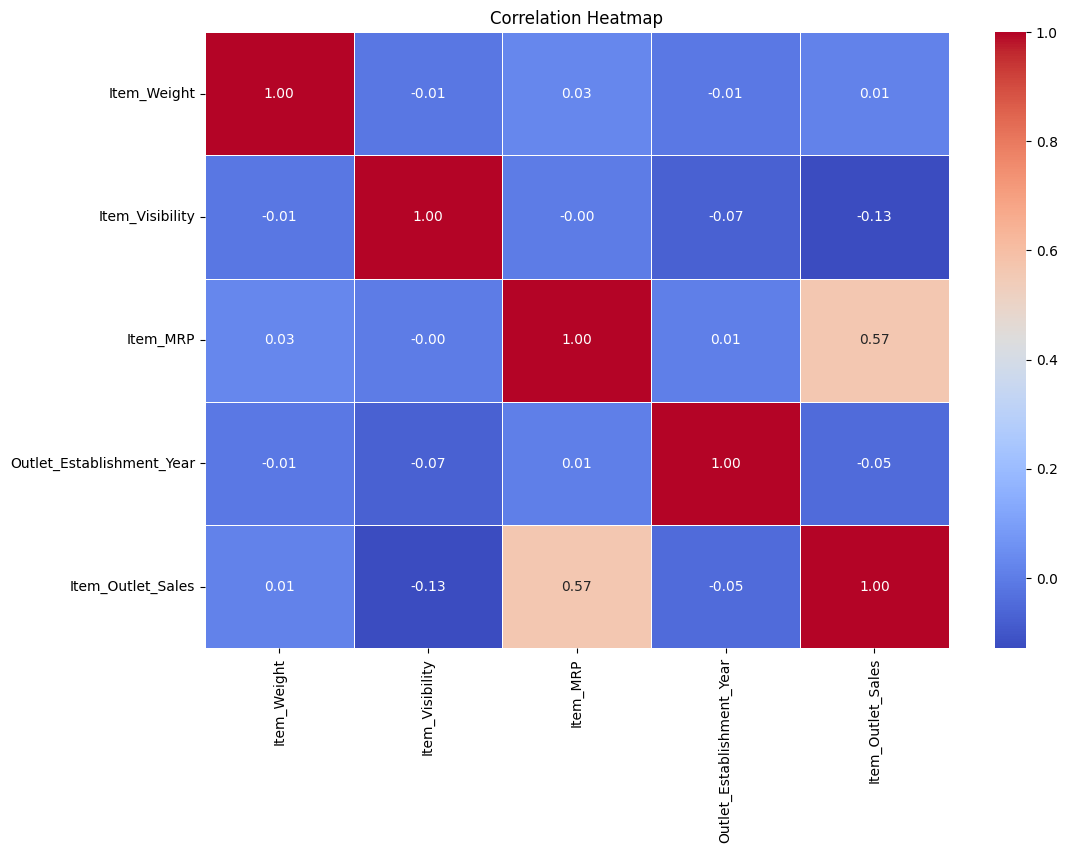

In [166]:
plt.figure(figsize=(12, 8))
correlation_matrix = Salesdf.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap");

#### Regression Plots

Creating regression plots to summarise and assess the relationship between numerical features and Item Outlet Sales

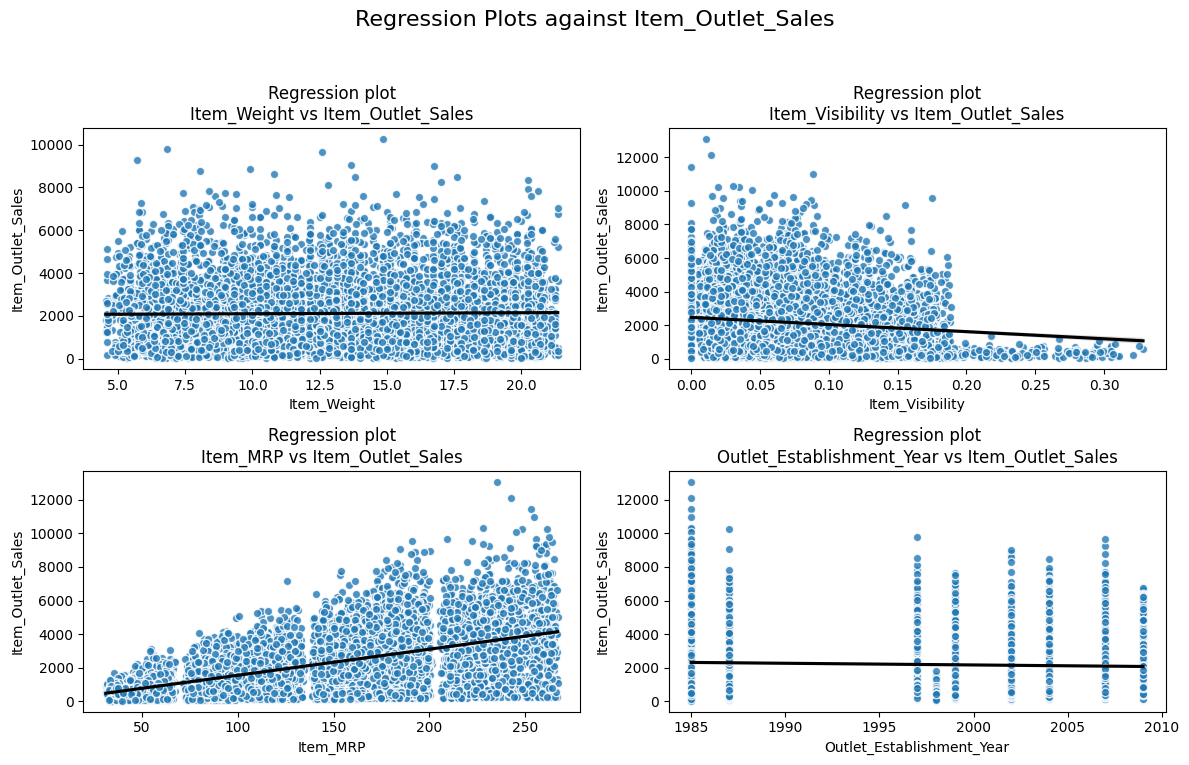

In [167]:
numerical_features = ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year']
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

# Plotting regression plots for each numerical feature against 'Item_Outlet_Sales'
for i, feature in enumerate(numerical_features):
    row = i // 2
    col = i % 2
    sns.regplot(data=Salesdf, x=feature, y='Item_Outlet_Sales', ax=axes[row, col],
                line_kws={"color": "black"}, scatter_kws={"edgecolor": "white"})
    axes[row, col].set_title(f"Regression plot\n{feature} vs Item_Outlet_Sales")

plt.suptitle("Regression Plots against Item_Outlet_Sales", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95]);

## Explanatory Data Analysis

### Feature Inspection

In [168]:
#Function for Categorical featues
def analyze_categorical_feature(df, feature_name):
    """
    Perform analysis for a given categorical feature.

    Parameters:
        df (pandas.DataFrame): The input DataFrame.
        feature_name (str): The name of the categorical feature to analyze.

    Returns:
        None
    """

    ax = sns.countplot(data=df, x=feature_name)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

    # Calculate the number of null values in the feature
    total_rows = len(df)
    null_values = df[feature_name].isna().sum()
    percentage_null_values = (null_values / total_rows) * 100

    print(f"\nNumber of rows with null values in '{feature_name}' column: {null_values}")
    print(f"Percentage of null values in '{feature_name}' column: {percentage_null_values:.2f}%")

    # Determine if the feature is quasi-constant or constant (most common value more than 98% of data)
    val_counts = df[feature_name].value_counts(dropna=False)
    freq = val_counts.values[0]
    perc_most_common = freq / len(df) * 100

    if perc_most_common > 98:
        print(f"\n[!] Warning: '{feature_name}' is a constant or quasi-constant feature and should be dropped.")
    else:
        print(f"'{feature_name}' is Not constant or quasi-constant.")

    # Calculate the cardinality of the feature
    cardinality = df[feature_name].nunique()
    print(f"The cardinality of '{feature_name}' feature is: {cardinality}")



In [169]:
#Function for numerical features

def analyze_numeric_feature(df, feature_name):
    """
    Perform analysis for a specific numeric feature in the DataFrame.

    Parameters:
        df (pandas.DataFrame): The input DataFrame.
        feature_name (str): The name of the numeric feature to analyze.

    Returns:
        None
    """

    # Plot the box plot for the numeric feature
    ax = sns.boxplot(data=df, x=feature_name)
    ax.set_title(f"Box Plot for {feature_name}")
    ax.set_xlabel(feature_name)
    ax.set_ylabel("Value")
    ax.figure.show()

    # Calculate the number of null values in the feature
    total_rows = len(df)
    null_values = df[feature_name].isna().sum()
    percentage_null_values = (null_values / total_rows) * 100

    print(f"Number of rows with null values: {null_values}")
    print(f"Percentage of null values: {percentage_null_values:.2f}%")

    # Determine if the feature is constant or quasi-constant (most common value more than 98% of data)
    val_counts = df[feature_name].value_counts(dropna=False)
    freq = val_counts.values[0]
    perc_most_common = freq / len(df) * 100

    if perc_most_common > 98:
        print(f"\n[!] Warning: '{feature_name}' is a constant or quasi-constant feature and should be dropped.")
    else:
        print(f"'{feature_name}' is Not constant or quasi-constant.")

    # Calculate the cardinality of the feature
    cardinality = df[feature_name].nunique()
    print(f"The cardinality of '{feature_name}' feature is: {cardinality}")



In [170]:
#Function for plotting multivariate visualisations between fatures and target

def plot_feature_vs_target(df, feature_name):
    """
    Plot a bar plot for categorical features and a scatter plot for numerical features against the target variable.

    Parameters:
        df (pandas.DataFrame): The input DataFrame.
        feature_name (str): The name of the feature to plot against the target variable.

    Returns:
        None
    """
    if feature_name not in df.columns:
        print(f"'{feature_name}' feature not found in the DataFrame.")
        return

    target_variable = 'Item_Outlet_Sales'
    data_type = df[feature_name].dtype

    if data_type == 'object' or data_type == 'category':
        # Categorical feature, create a bar plot
        plt.figure(figsize=(10, 6))
        sns.barplot(data=df, x=feature_name, y=target_variable)
        plt.title(f"{feature_name} vs. {target_variable}")
        plt.xlabel(feature_name)
        plt.ylabel(target_variable)
        plt.xticks(rotation=45, ha='right')
        plt.grid(True)
        plt.show()
    else:
        # Numerical feature, create a scatter plot
        plt.figure(figsize=(10, 6))
        sns.scatterplot(data=df, x=feature_name, y=target_variable)
        plt.title(f"{feature_name} vs. {target_variable}")
        plt.xlabel(feature_name)
        plt.ylabel(target_variable)
        plt.grid(True)
        plt.show()




####Item_Identifier

Product ID


Number of rows with null values in 'Item_Identifier' column: 0
Percentage of null values in 'Item_Identifier' column: 0.00%
'Item_Identifier' is Not constant or quasi-constant.
The cardinality of 'Item_Identifier' feature is: 1559


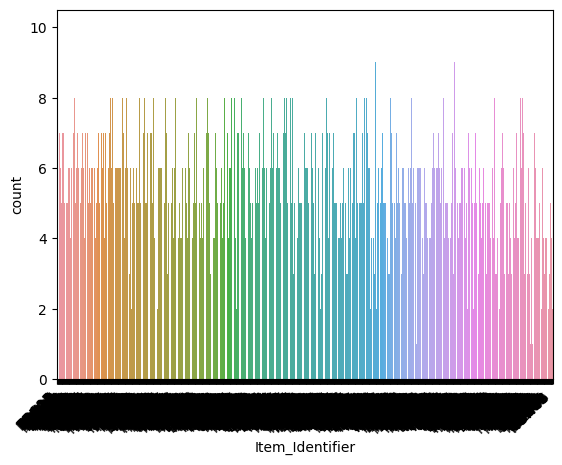

In [171]:
analyze_categorical_feature(Salesdf, 'Item_Identifier')

***Feature Observations:***

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)

> *This column is an identifier, and can therefore not be regarded as a feature that will be passed into a machine learning model*

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)

> *0 null value, therefore noting to impute*

3. Is the feature constant or quasi-constant?
> *No, it is not*

4. What is the cardinality? Is it high (>10)?
> *Feaure has 1559 unique value, it has high cardinality*

5. Would we know this feature before the target is determined?
> *Yes*

6. Is there a business case/understanding reason to exclude based on our business case?

> *The feature is a an identifier, therefore, it can be excluded*


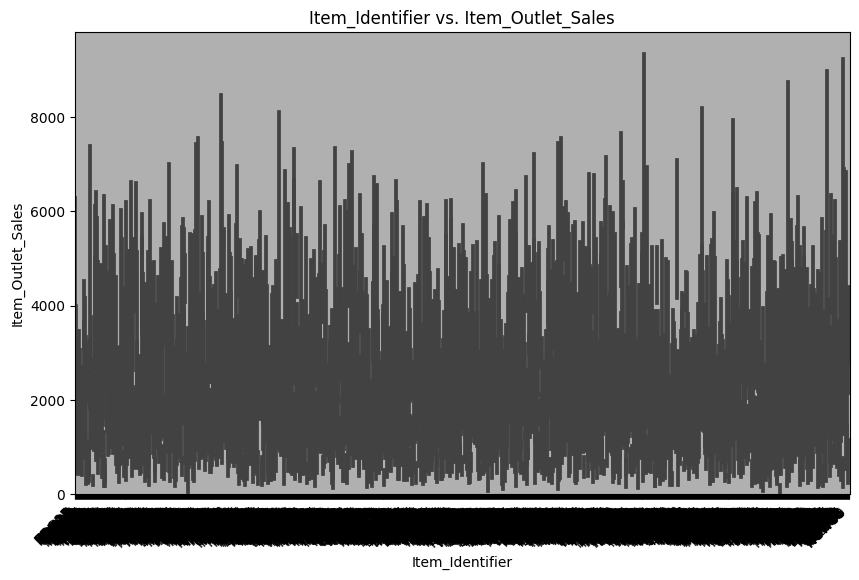

In [172]:
#Plot Item Identifier against the target
plot_feature_vs_target(Salesdf, 'Item_Identifier')

***Feature-Target Observation***

1. Based on your business understanding, would you expect this feature to be a predictor of the target?
    *   *No, because this is an identifier*

2. Does this feature appear to be a predictor of the target?
    *   *No, it does not*





#### Item_Weight

Weight of product

Number of rows with null values: 1463
Percentage of null values: 17.17%
'Item_Weight' is Not constant or quasi-constant.
The cardinality of 'Item_Weight' feature is: 415


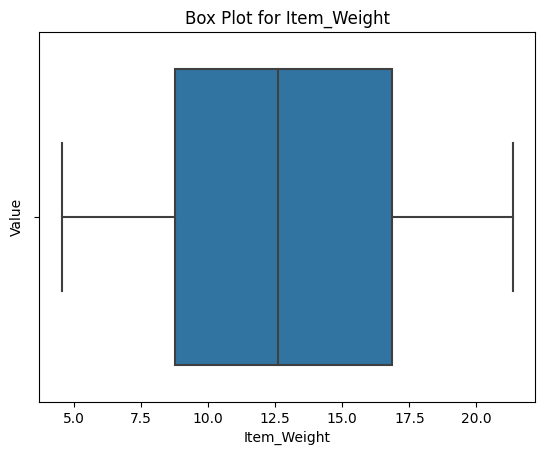

In [173]:
analyze_numeric_feature(Salesdf, 'Item_Weight')

***Feature Observations:***

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)

    *   *Item_Type is a numerical feature*

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)
    *   *1463 / 17.17% null values, therefore given the high percentage of nulls in the data for this feature, it would not be recommended for the rows to be dropped. Therefore the missing values will be filled with a zero (0) value*

3. Is the feature constant or quasi-constant?
    *   *No, it is not*
4. What is the cardinality? Is it high (>10)?
    *   *Feaure has 415 unique values, it has high cardinality*
5. Would we know this feature before the target is determined?
    *   *Yes*
6. Is there a business case/understanding reason to exclude based on our business case?
    *   *No*


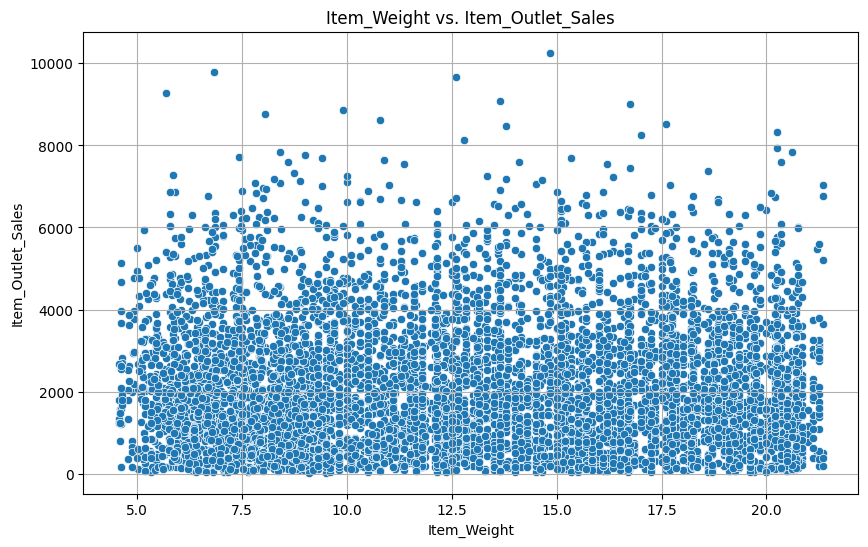

In [174]:
#Plot Item_Weight against the target
plot_feature_vs_target(Salesdf, 'Item_Weight')

***Feature-Target Observation***

1. Based on your business understanding, would you expect this feature to be a predictor of the target?
    *   *No, A heavy item does not necessarily mean that it costs more*

2. Does this feature appear to be a predictor of the target?
    *   *No, it does not*





#### Item_Fat_Content

Whether the product is low-fat or regular


Number of rows with null values in 'Item_Fat_Content' column: 0
Percentage of null values in 'Item_Fat_Content' column: 0.00%
'Item_Fat_Content' is Not constant or quasi-constant.
The cardinality of 'Item_Fat_Content' feature is: 2


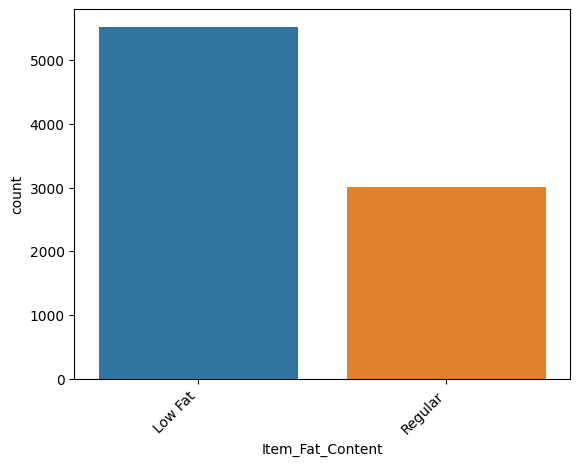

In [175]:
analyze_categorical_feature(Salesdf, 'Item_Fat_Content');

***Feature Observations:***

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)

> *Item_Fat_Content is a categorical (nominal) feature*

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)

> *0 null value, therefore noting to impute*

3. Is the feature constant or quasi-constant?
> *No, it is not*

4. What is the cardinality? Is it high (>10)?
> *Feaure has 2 unique values, it has low cardinality*

5. Would we know this feature before the target is determined?
> *Yes*

6. Is there a business case/understanding reason to exclude based on our business case?

> *No*


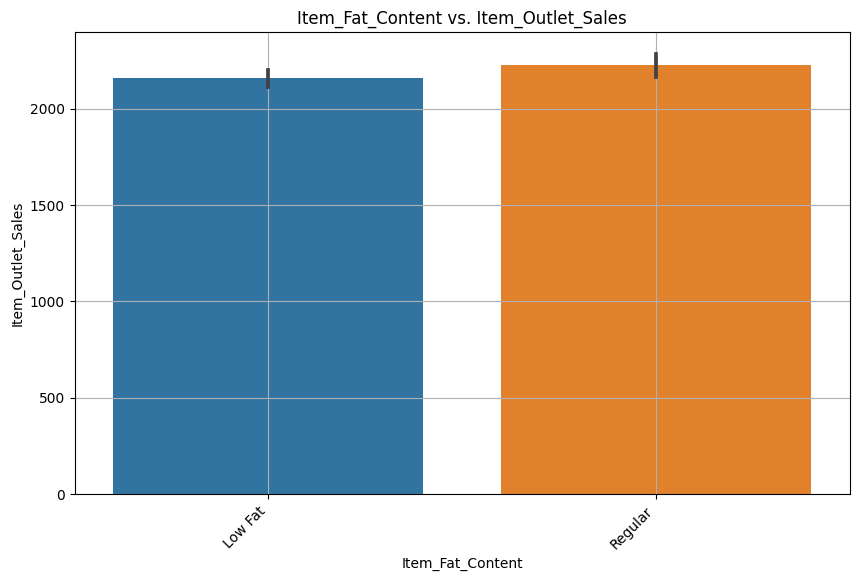

In [176]:
#Plot Item_Fat_Content against the target
plot_feature_vs_target(Salesdf, 'Item_Fat_Content')

***Feature-Target Observation***

1. Based on your business understanding, would you expect this feature to be a predictor of the target?
    *   *No*

2. Does this feature appear to be a predictor of the target?
    *   *No*





#### Item_Visibility

The percentage of total display area of all products in a store allocated to the particular product

Number of rows with null values: 0
Percentage of null values: 0.00%
'Item_Visibility' is Not constant or quasi-constant.
The cardinality of 'Item_Visibility' feature is: 7880


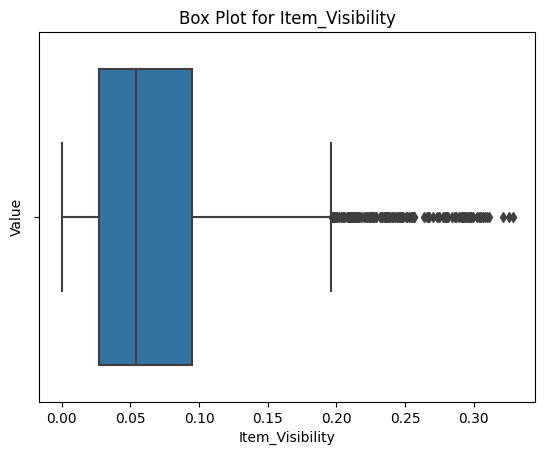

In [177]:
analyze_numeric_feature(Salesdf, 'Item_Visibility');

***Feature Observations:***

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)

    *   *Outlet Identifier is a numerical feature*

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)
    *   *0 null value, therefore noting to impute*

3. Is the feature constant or quasi-constant?
    *   *No, it is not*
4. What is the cardinality? Is it high (>10)?
    *   *Feaure has 7880 unique values, it has high cardinality*
5. Would we know this feature before the target is determined?
    *   *Yes*
6. Is there a business case/understanding reason to exclude based on our business case?
    *   *No*


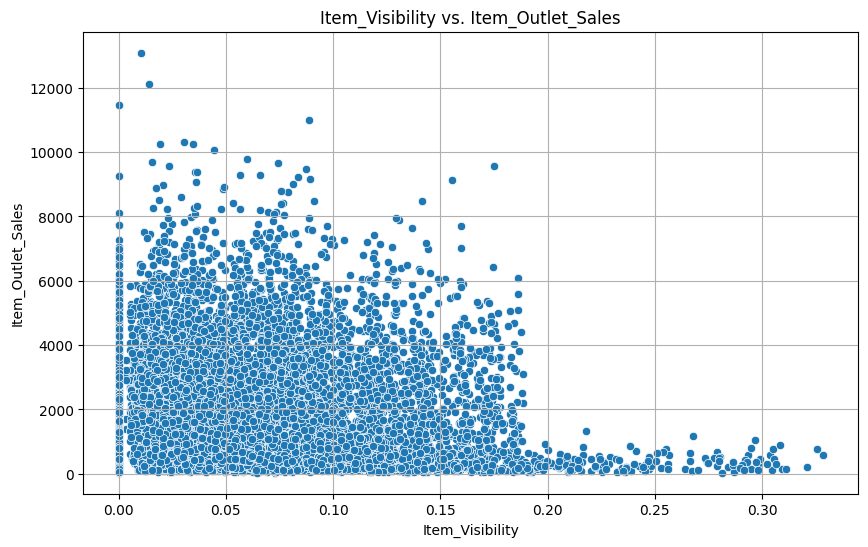

In [178]:
#Plot Item_Visibility against the target
plot_feature_vs_target(Salesdf, 'Item_Visibility')

***Feature-Target Observation***

1. Based on your business understanding, would you expect this feature to be a predictor of the target?
    *   *Yes, I would expect items with more visibility to yield more sales*

2. Does this feature appear to be a predictor of the target?
    *   *Yes, but the items with lower visibility have higher the sales*


####Item_Type

The category to which the product belongs


Number of rows with null values in 'Item_Type' column: 0
Percentage of null values in 'Item_Type' column: 0.00%
'Item_Type' is Not constant or quasi-constant.
The cardinality of 'Item_Type' feature is: 16


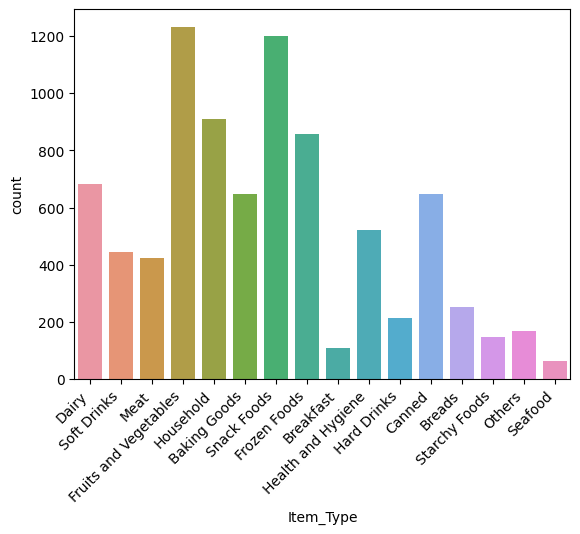

In [179]:
analyze_categorical_feature(Salesdf, 'Item_Type');

***Feature Observations:***

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)

    *   *Item_Type is a categorical (nominal) feature*

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)
    *   *0 null value, therefore noting to impute*

3. Is the feature constant or quasi-constant?
    *   *No, it is not*
4. What is the cardinality? Is it high (>10)?
    *   *Feaure has 16 unique values, it has high cardinality*
5. Would we know this feature before the target is determined?
    *   *Yes*
6. Is there a business case/understanding reason to exclude based on our business case?
    *   *No*


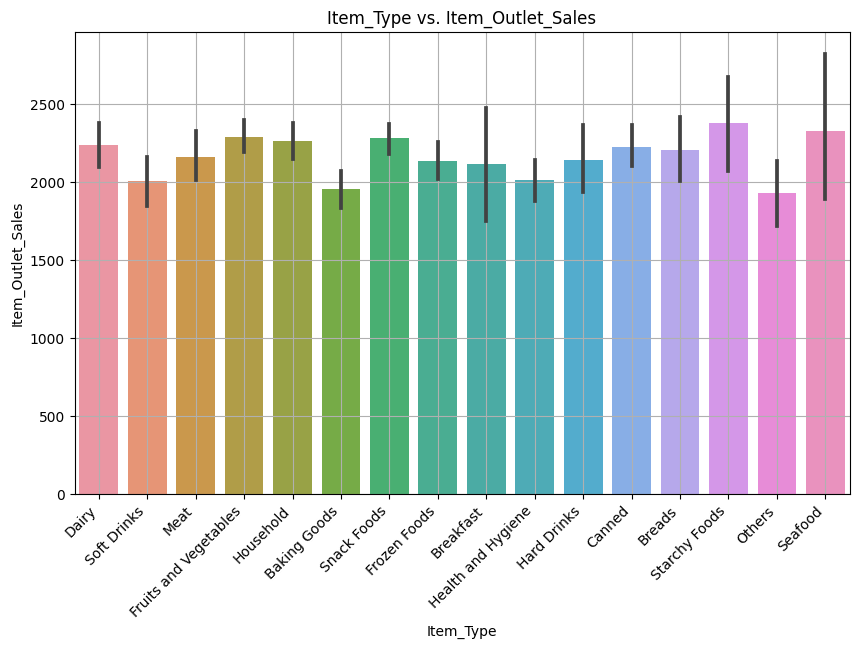

In [180]:
#Plot Item_Type against the target
plot_feature_vs_target(Salesdf, 'Item_Type')

***Feature-Target Observation***

1. Based on your business understanding, would you expect this feature to be a predictor of the target?
    *   *Yes, most loved items might yield more sales*

2. Does this feature appear to be a predictor of the target?
    *   *Yes, seafood and startchy food have higher sales*





####Item_MRP

Maximum Retail Price (list price) of the product

Number of rows with null values: 0
Percentage of null values: 0.00%
'Item_MRP' is Not constant or quasi-constant.
The cardinality of 'Item_MRP' feature is: 5938


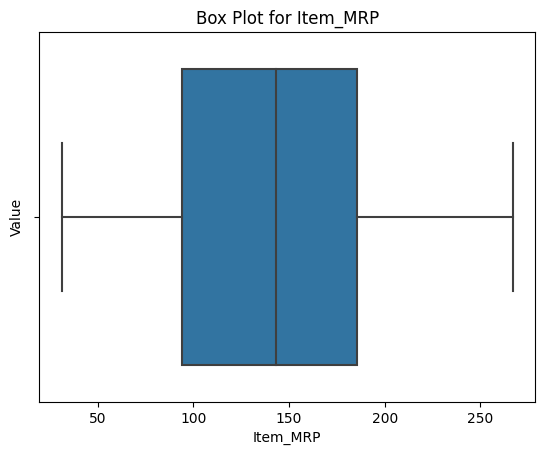

In [181]:
analyze_numeric_feature(Salesdf, 'Item_MRP');

***Feature Observations:***

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)

    *   *Outlet Identifier is a numerical feature*

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)
    *   *0 null value, therefore noting to impute*

3. Is the feature constant or quasi-constant?
    *   *No, it is not*
4. What is the cardinality? Is it high (>10)?
    *   *Feaure has 5938 unique values, it has high cardinality*
5. Would we know this feature before the target is determined?
    *   *Yes*
6. Is there a business case/understanding reason to exclude based on our business case?
    *   *No*


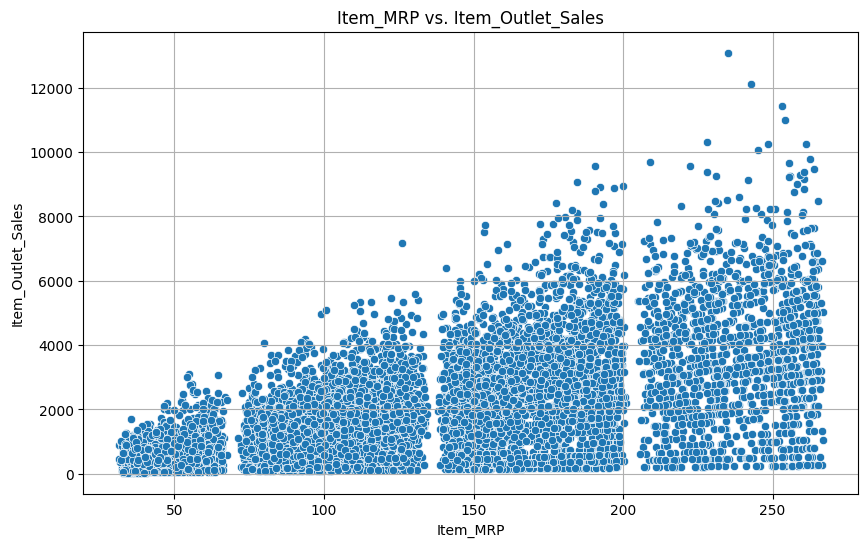

In [182]:
#Plot Item_MRP against the target
plot_feature_vs_target(Salesdf, 'Item_MRP')

***Feature-Target Observation***

1. Based on your business understanding, would you expect this feature to be a predictor of the target?
    *   *Yes, items with higher MRP would yield more Sales*

2. Does this feature appear to be a predictor of the target?
    *   *Yes, sales a higher for items with higher MRP, there is a positive correlation between MRP and Sales*





#### Outlet_Identifier

Store ID


Number of rows with null values in 'Outlet_Identifier' column: 0
Percentage of null values in 'Outlet_Identifier' column: 0.00%
'Outlet_Identifier' is Not constant or quasi-constant.
The cardinality of 'Outlet_Identifier' feature is: 10


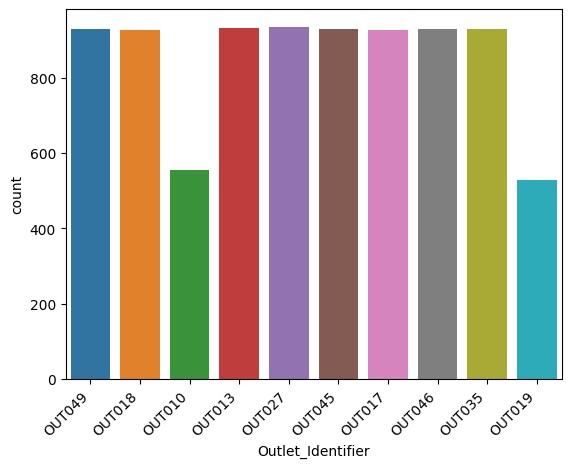

In [183]:
analyze_categorical_feature(Salesdf, 'Outlet_Identifier');

***Feature Observations:***

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)

    *   *Outlet Identifier is a categorical (nominal) feature*

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)
    *   *0 null value, therefore noting to impute*

3. Is the feature constant or quasi-constant?
    *   *No, it is not*
4. What is the cardinality? Is it high (>10)?
    *   *Feaure has 10 unique values, it has low cardinality*
5. Would we know this feature before the target is determined?
    *   *Yes*
6. Is there a business case/understanding reason to exclude based on our business case?
    *   *No*


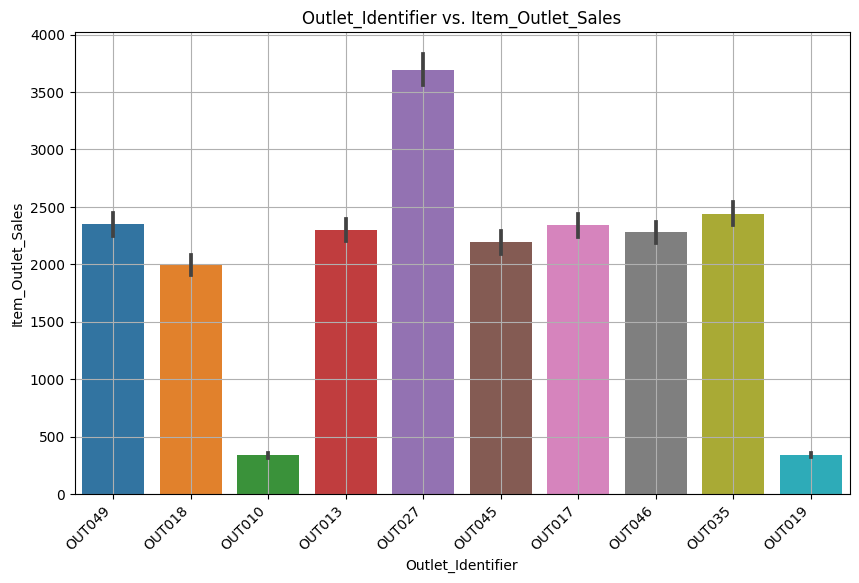

In [184]:
#Plot Outlet_Identifier against the target
plot_feature_vs_target(Salesdf, 'Outlet_Identifier')

***Feature-Target Observation***

1. Based on your business understanding, would you expect this feature to be a predictor of the target?
    *   *Yes,some outlets might have more sales than others*

2. Does this feature appear to be a predictor of the target?
    *   *Yes, OUT027, seems to have the most sales*





#### Outlet_Establishment_Year

The year in which store was established

Number of rows with null values: 0
Percentage of null values: 0.00%
'Outlet_Establishment_Year' is Not constant or quasi-constant.
The cardinality of 'Outlet_Establishment_Year' feature is: 9


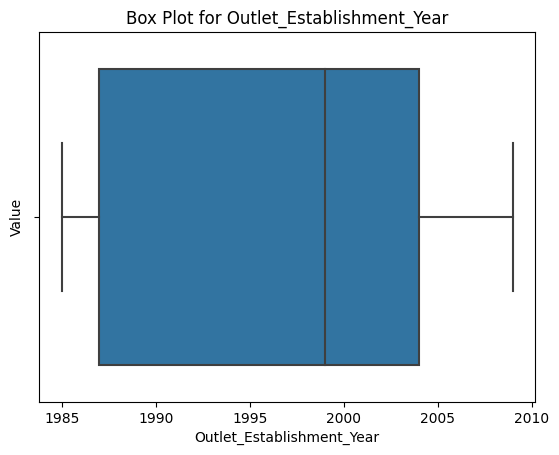

In [185]:
analyze_numeric_feature(Salesdf, 'Outlet_Establishment_Year');

***Feature Observations:***

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)

    *   *numerical feature*

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)
    *   *0 null value, therefore noting to impute*

3. Is the feature constant or quasi-constant?
    *   *No, it is not*
4. What is the cardinality? Is it high (>10)?
    *   *Feaure has 9 unique values, it has low cardinality*
5. Would we know this feature before the target is determined?
    *   *Yes*
6. Is there a business case/understanding reason to exclude based on our business case?
    *   *No*


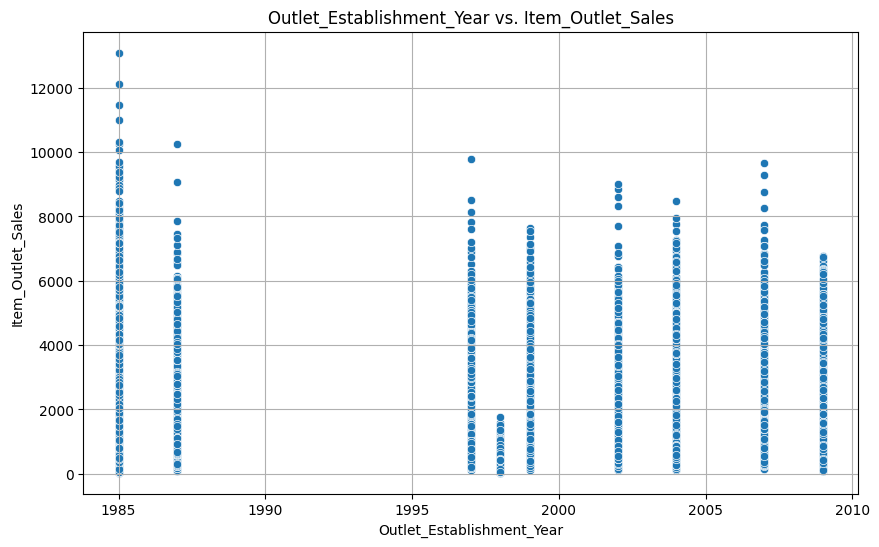

In [186]:
#Plot Outlet_Establishment_Year against the target
plot_feature_vs_target(Salesdf, 'Outlet_Establishment_Year')

***Feature-Target Observation***

1. Based on your business understanding, would you expect this feature to be a predictor of the target?
    *   *Yes, i would expect older establishments to have higher sales than newer establishments*

2. Does this feature appear to be a predictor of the target?
    *   *No, the correlation between this feature and sales is not clear*





#### Outlet_Size

The size of the store in terms of ground area covered


Number of rows with null values in 'Outlet_Size' column: 2410
Percentage of null values in 'Outlet_Size' column: 28.28%
'Outlet_Size' is Not constant or quasi-constant.
The cardinality of 'Outlet_Size' feature is: 3


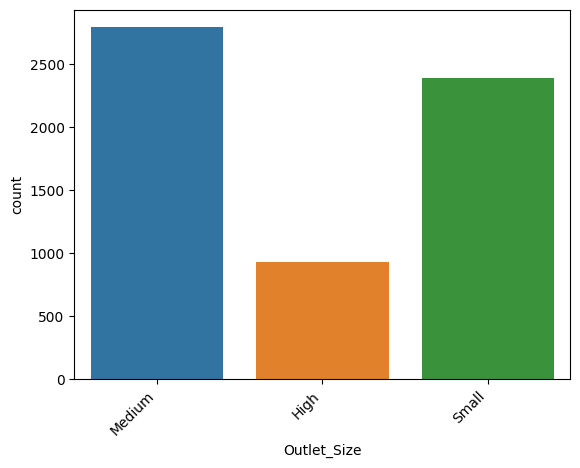

In [187]:
analyze_categorical_feature(Salesdf, 'Outlet_Size');

***Feature Observations:***

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)

    *   *Outlet Size is an ordinal feature*

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)
    *   *2410/28.28% null values, therefore Given the high percentage of nulls in the data for this feature, it would not be recommended for the rows to be dropped. Therefore the missing values will be filled with a placeholder like 'unknown' or 'missing'*

3. Is the feature constant or quasi-constant?
    *   *No, it is not*
4. What is the cardinality? Is it high (>10)?
    *   *Feaure has 3 unique values, it has low cardinality*
5. Would we know this feature before the target is determined?
    *   *Yes*
6. Is there a business case/understanding reason to exclude based on our business case?
    *   *No*


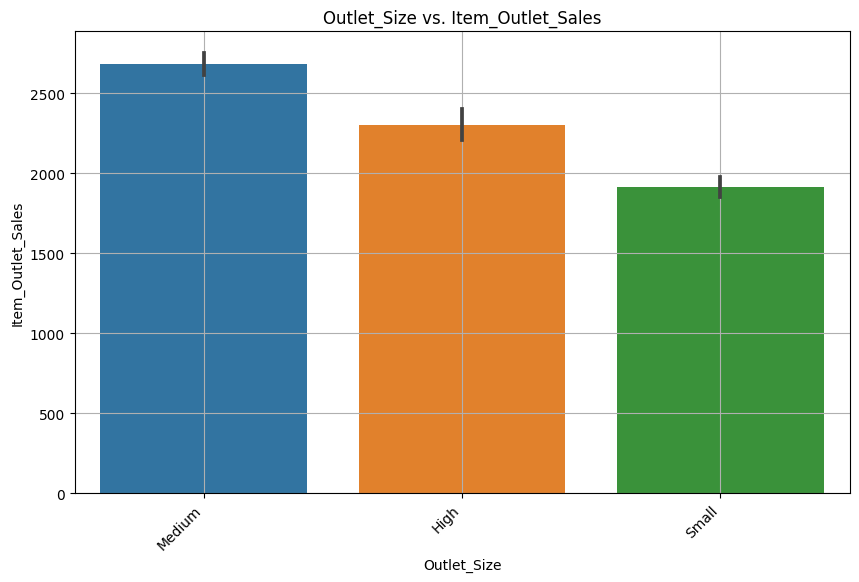

In [188]:
#Plot Outlet_Size against the target
plot_feature_vs_target(Salesdf, 'Outlet_Size')

***Feature-Target Observation***

1. Based on your business understanding, would you expect this feature to be a predictor of the target?
    *   *Yes, i would expect bigger outlets to have higher sales than smaller outlets
2. Does this feature appear to be a predictor of the target?
    *   *No, medium outlets seem to have more sales than high sized outlets*





#### Outlet_Location_Type

The type of area in which the store is located


Number of rows with null values in 'Outlet_Location_Type' column: 0
Percentage of null values in 'Outlet_Location_Type' column: 0.00%
'Outlet_Location_Type' is Not constant or quasi-constant.
The cardinality of 'Outlet_Location_Type' feature is: 3


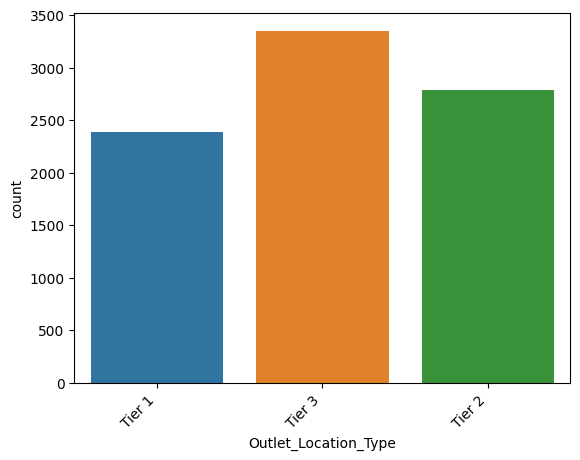

In [189]:
analyze_categorical_feature(Salesdf, 'Outlet_Location_Type');

***Feature Observations:***

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)

    *   *Outlet Location Type is an ordinal feature*

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)
    *   *0 null value, therefore noting to impute*

3. Is the feature constant or quasi-constant?
    *   *No, it is not*
4. What is the cardinality? Is it high (>10)?
    *   *Feaure has 3 unique values, it has low cardinality*
5. Would we know this feature before the target is determined?
    *   *Yes*
6. Is there a business case/understanding reason to exclude based on our business case?
    *   *No*


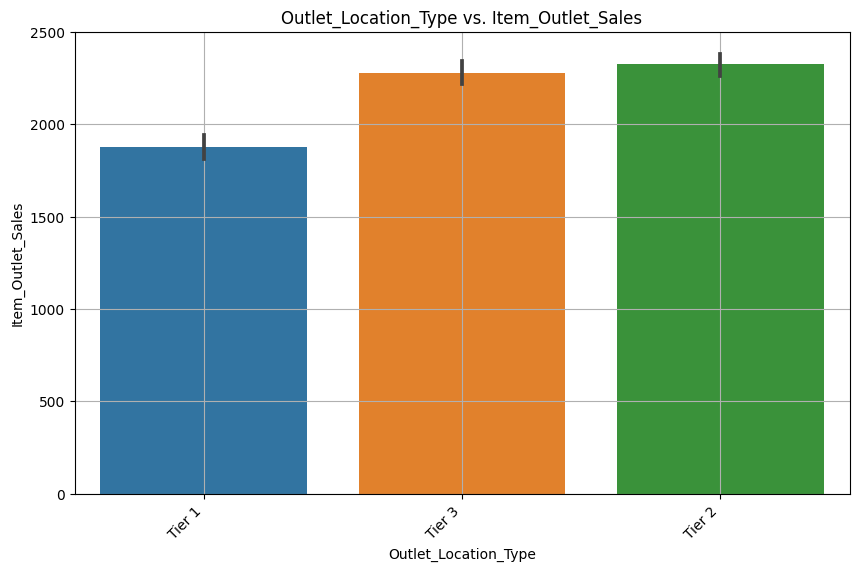

In [190]:
#Plot Outlet_Location_Type against the target
plot_feature_vs_target(Salesdf, 'Outlet_Location_Type')

***Feature-Target Observation***

1. Based on your business understanding, would you expect this feature to be a predictor of the target?
    *   *Yes*

2. Does this feature appear to be a predictor of the target?
    *   *No, the correlation between this feature and sales is not clear*


#### Outlet_Type

Whether the outlet is a grocery store or some sort of supermarket


Number of rows with null values in 'Outlet_Type' column: 0
Percentage of null values in 'Outlet_Type' column: 0.00%
'Outlet_Type' is Not constant or quasi-constant.
The cardinality of 'Outlet_Type' feature is: 4


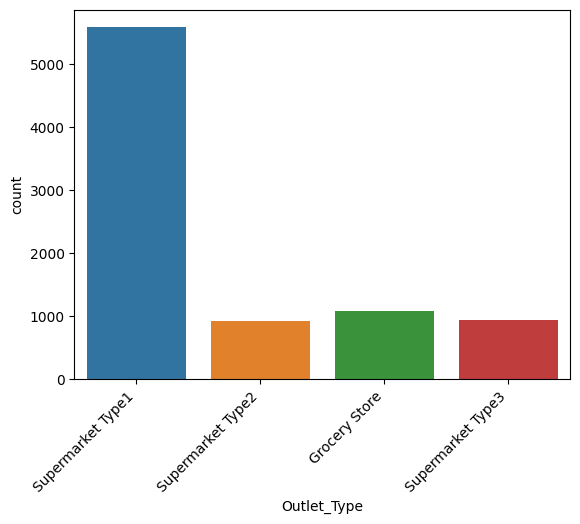

In [191]:
analyze_categorical_feature(Salesdf, 'Outlet_Type');

***Feature Observations:***

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)

    *   *Outlet Type is a cateorical feature*

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)
    *   *0 null value, therefore noting to impute*

3. Is the feature constant or quasi-constant?
    *   *No, it is not*
4. What is the cardinality? Is it high (>10)?
    *   *Feaure has 4 unique values, it has low cardinality*
5. Would we know this feature before the target is determined?
    *   *Yes*
6. Is there a business case/understanding reason to exclude based on our business case?
    *   *No*


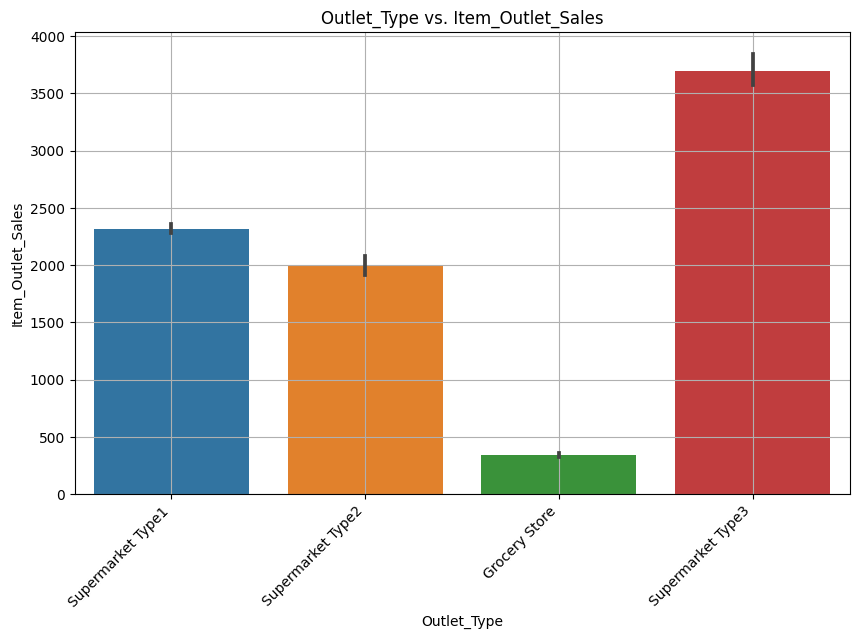

In [192]:
#Plot Outlet_Type against the target
plot_feature_vs_target(Salesdf, 'Outlet_Type')

***Feature-Target Observation***

1. Based on your business understanding, would you expect this feature to be a predictor of the target?
    *   *Yes, i would expect certain outlet types to have more sales than other
2. Does this feature appear to be a predictor of the target?
    *   *Yes, Supermarket Type 3 has the most sales*

#### Item_Outlet_Sales

Sales of the product in the particular store. This is the target variable to be predicted.

Number of rows with null values: 0
Percentage of null values: 0.00%
'Item_Outlet_Sales' is Not constant or quasi-constant.
The cardinality of 'Item_Outlet_Sales' feature is: 3493


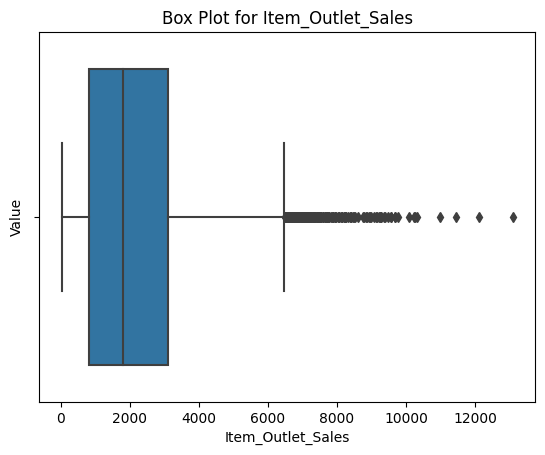

In [193]:
analyze_numeric_feature(Salesdf, 'Item_Outlet_Sales');

***Feature Observations:***

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)

    *   *numerical feature*

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)
    *   *0 null value, therefore noting to impute*

3. Is the feature constant or quasi-constant?
    *   *No, it is not*
4. What is the cardinality? Is it high (>10)?
    *   *Feaure has 3493 unique values, it has high cardinality*
5. Would we know this feature before the target is determined?
    *   *Yes*
6. Is there a business case/understanding reason to exclude based on our business case?
    *   *Yes, because it is the target variable*
